Preview of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Model Accuracy: 1.00 or 100.00%

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00    

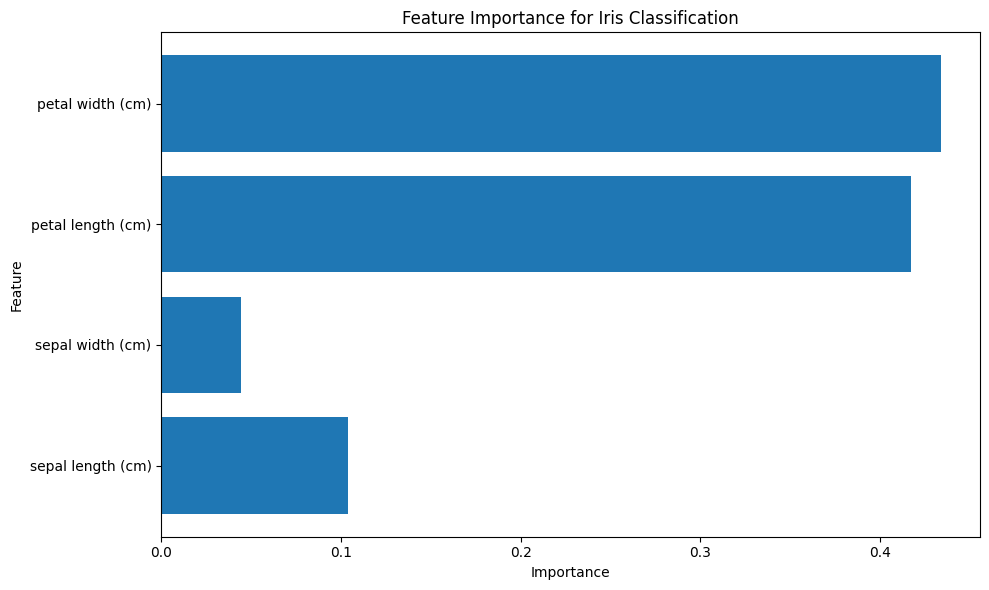


Example prediction:
Measurements: [6.1 2.8 4.7 1.2]
Predicted species: versicolor
Actual species: versicolor


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target labels (0, 1, 2 for three iris species)

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in y]

# Print the first 5 rows of the dataset
print("Preview of the dataset:")
print(iris_df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f} or {accuracy*100:.2f}%")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Feature importance
feature_importance = model.feature_importances_
features = iris.feature_names

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Iris Classification')
plt.tight_layout()
plt.show()

# Example prediction
example = X_test[0].reshape(1, -1)
prediction = model.predict(example)
print(f"\nExample prediction:")
print(f"Measurements: {X_test[0]}")
print(f"Predicted species: {iris.target_names[prediction[0]]}")
print(f"Actual species: {iris.target_names[y_test[0]]}")
